<a href="https://colab.research.google.com/github/mantoan-thi/Analise_Exploratoria/blob/main/churn_risk_rate_hackerearth_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Essa base de dados foi obtidas no kaggle
# Link: https://www.kaggle.com/imsparsh/churn-risk-rate-hackerearth-ml

In [ ]:
''' Decrisção no kaggle
Contexto
A taxa de rotatividade é uma métrica de marketing que descreve o número de clientes que deixam uma empresa durante um período de tempo específico. . Cada usuário recebe um valor de previsão que estima seu estado de rotatividade a qualquer momento. Este valor é baseado em:

Informações demográficas do usuário
Comportamento de navegação
Dados históricos de compras, entre outras informações
Ele leva em consideração nossas previsões exclusivas e proprietárias de quanto tempo um usuário permanecerá como cliente. Essa pontuação é atualizada todos os dias para todos os usuários que têm no mínimo uma conversão. Os valores atribuídos estão entre 1 e 5.

Tarefa
Sua tarefa é prever a pontuação de rotatividade de um site com base nos recursos fornecidos no conjunto de dados.
'''

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df = pd.read_csv('/content/train.csv')

In [75]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [76]:
# Traduzindo as colunas...
df.rename(columns={'customer_id':'Identificação do Cliente', 
                   'Name':'Nome', 'age':'Idade', 'gender':'Gênero sexual',
                   'security_no':'Sem seguro','region_category':'categoria de região', 
                   'membership_category':'categoria de associação', 
                   'joining_date':'Data de ingresso','joined_through_referral':'juntou-se por referência', 
                   'referral_id':'id de referência', 'preferred_offer_types':'tipos de oferta preferidos',
                   'medium_of_operation':'meio de operação', 'internet_option':'opção de internet', 
                   'last_visit_time':'hora da última visita','days_since_last_login':'dias desde o último login',
                   'avg_time_spent':'tempo médio gasto','avg_transaction_value':'valor médio de transação',
                   'avg_frequency_login_days':'média de freqüência de dias de login', 
                   'points_in_wallet':'pontos na carteira', 'used_special_discount':'desconto especial usado',
                   'offer_application_preference':'oferecer preferência de aplicativo', 'past_complaint':'reclamação anterior', 
                   'complaint_status':'status de reclamação','feedback':'comentários', 
                   'churn_risk_score':'pontuação de risco de rotatividade'},inplace=True)

In [77]:
df.describe()

,Idade,dias desde o último login,tempo médio gasto,valor médio de transação,pontos na carteira,pontuação de risco de rotatividade
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Idade,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
dias desde o último login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
tempo médio gasto,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
valor médio de transação,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
pontos na carteira,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
pontuação de risco de rotatividade,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.000,5.000000


In [79]:
# Como temos 4456 dados e temos somentes 159 com pontuação de risco de rotatividade -1.

In [80]:
df = df[df['pontuação de risco de rotatividade']>1]

In [81]:
df.isnull().mean()*100

Identificação do Cliente                 0.000000
Nome                                     0.000000
Idade                                    0.000000
Gênero sexual                            0.000000
Sem seguro                               0.000000
categoria de região                     14.733098
categoria de associação                  0.000000
Data de ingresso                         0.000000
juntou-se por referência                 0.000000
id de referência                         0.000000
tipos de oferta preferidos               0.795732
meio de operação                         0.000000
opção de internet                        0.000000
hora da última visita                    0.000000
dias desde o último login                0.000000
tempo médio gasto                        0.000000
valor médio de transação                 0.000000
média de freqüência de dias de login     0.000000
pontos na carteira                       9.289568
desconto especial usado                  0.000000


Text(0, 0.5, 'Valores da Rotatividade')

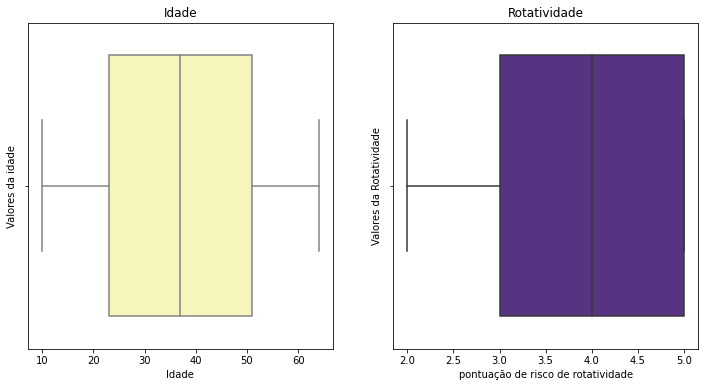

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = sns.boxplot(x='Idade',data=df,orient='V',color ='#ffffb2')
fig.set_title('Idade')
fig.set_ylabel('Valores da idade')

plt.subplot(1,2,2)
fig = sns.boxplot(x='pontuação de risco de rotatividade',data=df,orient='V',color ='#54278f')
fig.set_title('Rotatividade')
fig.set_ylabel('Valores da Rotatividade')